# Explore here

In [37]:
import requests
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer
import statsmodels.api as sm
import missingno as msno
from numpy import NaN
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from lazypredict.Supervised import LazyRegressor



In [4]:
dataset = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
df = pd.DataFrame(dataset)
df['room_type']



0           Private room
1        Entire home/apt
2           Private room
3        Entire home/apt
4        Entire home/apt
              ...       
48890       Private room
48891       Private room
48892    Entire home/apt
48893        Shared room
48894       Private room
Name: room_type, Length: 48895, dtype: object

In [5]:
def room_type(df):
    Entire = []
    Shared = []
    Private = []
    for room in df['room_type']:
        if room == 'Private room':
            Entire.append(0)
            Shared.append(0)
            Private.append(1)
        elif room == 'Entire home/apt':
            Entire.append(1)
            Shared.append(0)
            Private.append(0)
        if room == 'Shared room':
            Entire.append(0)
            Shared.append(1)
            Private.append(0)
    df['Entire room/apt'] = Entire
    df['Private room'] = Private
    df['Shared room'] = Shared

    return df

room_type(df)


            




,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Entire room/apt,Private room,Shared room
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0,1,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,0,1,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,1,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,0,1,0
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,0,1,0
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,1,0,0
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,0,0,1


In [6]:
np.unique(df['neighbourhood_group'])

def neighbourhood(df):
    Bronx = []
    Manhattan = []
    Queens = []
    Staten_Island = []
    Brooklyn = []
    for room in df['neighbourhood_group']:
        if room == 'Bronx':
            Bronx.append(1)
            Queens.append(0)
            Manhattan.append(0)
            Staten_Island.append(0)
            Brooklyn.append(0)
        elif room == 'Brooklyn':
            Bronx.append(0)
            Queens.append(0)
            Manhattan.append(0)
            Staten_Island.append(0)
            Brooklyn.append(1)
        elif room == 'Manhattan':
            Bronx.append(0)
            Queens.append(0)
            Manhattan.append(1)
            Staten_Island.append(0)
            Brooklyn.append(0)
        elif room == 'Queens':
            Bronx.append(0)
            Queens.append(1)
            Manhattan.append(0)
            Staten_Island.append(0)
            Brooklyn.append(0)
        elif room == 'Staten Island':
            Bronx.append(0)
            Queens.append(0)
            Manhattan.append(0)
            Staten_Island.append(1)
            Brooklyn.append(0)
    df['Bronx'] = Bronx
    df['Manhattan'] = Manhattan
    df['Brooklyn'] = Brooklyn
    df['Staten Island'] = Staten_Island
    df['Queens'] = Queens
    return df

neighbourhood(df)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,calculated_host_listings_count,availability_365,Entire room/apt,Private room,Shared room,Bronx,Manhattan,Brooklyn,Staten Island,Queens
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,6,365,0,1,0,0,0,1,0,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,2,355,1,0,0,0,1,0,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,...,1,365,0,1,0,0,1,0,0,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,1,194,1,0,0,0,0,1,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,...,2,9,0,1,0,0,0,1,0,0
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,...,2,36,0,1,0,0,0,1,0,0
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,...,1,27,1,0,0,0,1,0,0,0
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,...,6,2,0,0,1,0,1,0,0,0


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
count_unique = df.nunique()
print(count_unique)
df.describe()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
Entire room/apt                       2
Private room                          2
Shared room                           2
Bronx                                 2
Manhattan                             2
Brooklyn                              2
Staten Island                         2
Queens                                2
dtype: int64


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Entire room/apt,Private room,Shared room,Bronx,Manhattan,Brooklyn,Staten Island,Queens
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327,0.519665,0.456611,0.023724,0.022313,0.443011,0.411167,0.007629,0.115881
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289,0.499618,0.498119,0.152190,0.147701,0.496747,0.492050,0.087009,0.320085
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

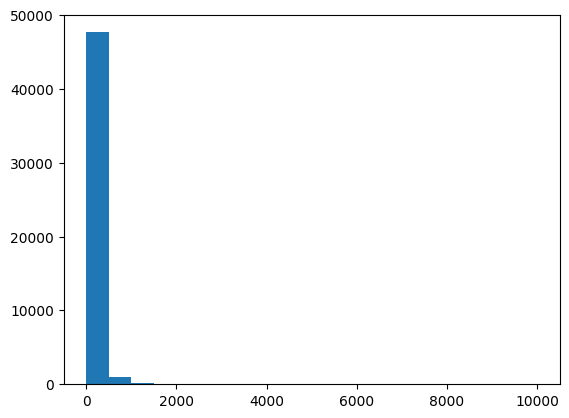

In [9]:
y = df.price.values
#replace 0 price values by price average of similar advertisements
imp_knn = KNNImputer(n_neighbors=3)
df['price'] = df['price'].replace(0, np.nan)
df[['price']] = imp_knn.fit_transform(df[['price']])  

plt.hist(y, bins=20)
plt.show


{'whiskers': [<matplotlib.lines.Line2D at 0x7f8ed1f5b790>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8ed1f68b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8ed1f58ad0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8ed1f69cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8ed1f6a550>],
 'means': []}

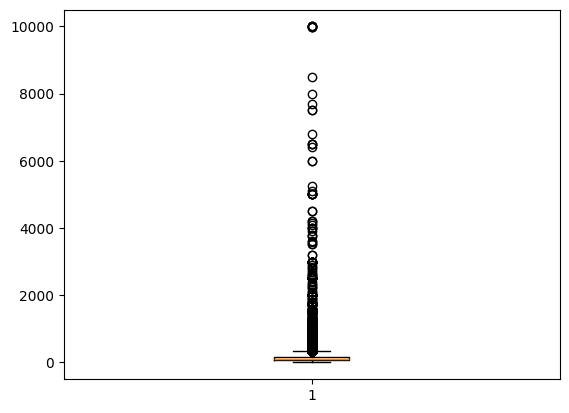

In [10]:
plt.boxplot(y)

In [11]:
df['log_price'] = np.log(df.price)

[]

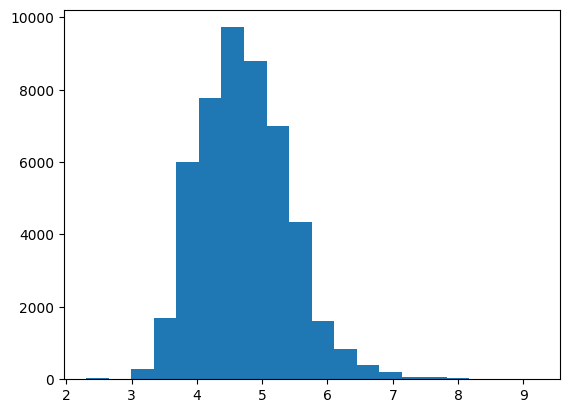

In [12]:
plt.hist(df['log_price'], bins=20)
plt.plot()


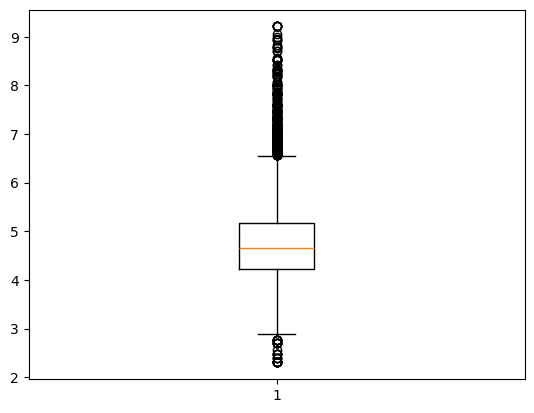

In [13]:
plt.boxplot(df['log_price'])
plt.show()

In [14]:
df.isna().mean()*100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
Entire room/apt                    0.000000
Private room                       0.000000
Shared room                        0.000000
Bronx                              0.000000
Manhattan                          0.000000
Brooklyn                           0.000000
Staten Island                   

In [15]:
#The following columns are removed because they do not signifficantly affect the price of the propperty and because they have signifficant gaps in the data, which would lead to problems with the model
df.drop(['last_review', 'reviews_per_month'], inplace=True, axis=1)

#Drop irrelevant data (The following variables do not contribute to the variability in price of the propperty for self apparent reasons)
df.drop(['id', 'name', 'host_id', 'host_name'], inplace=True, axis=1)

<Axes: >

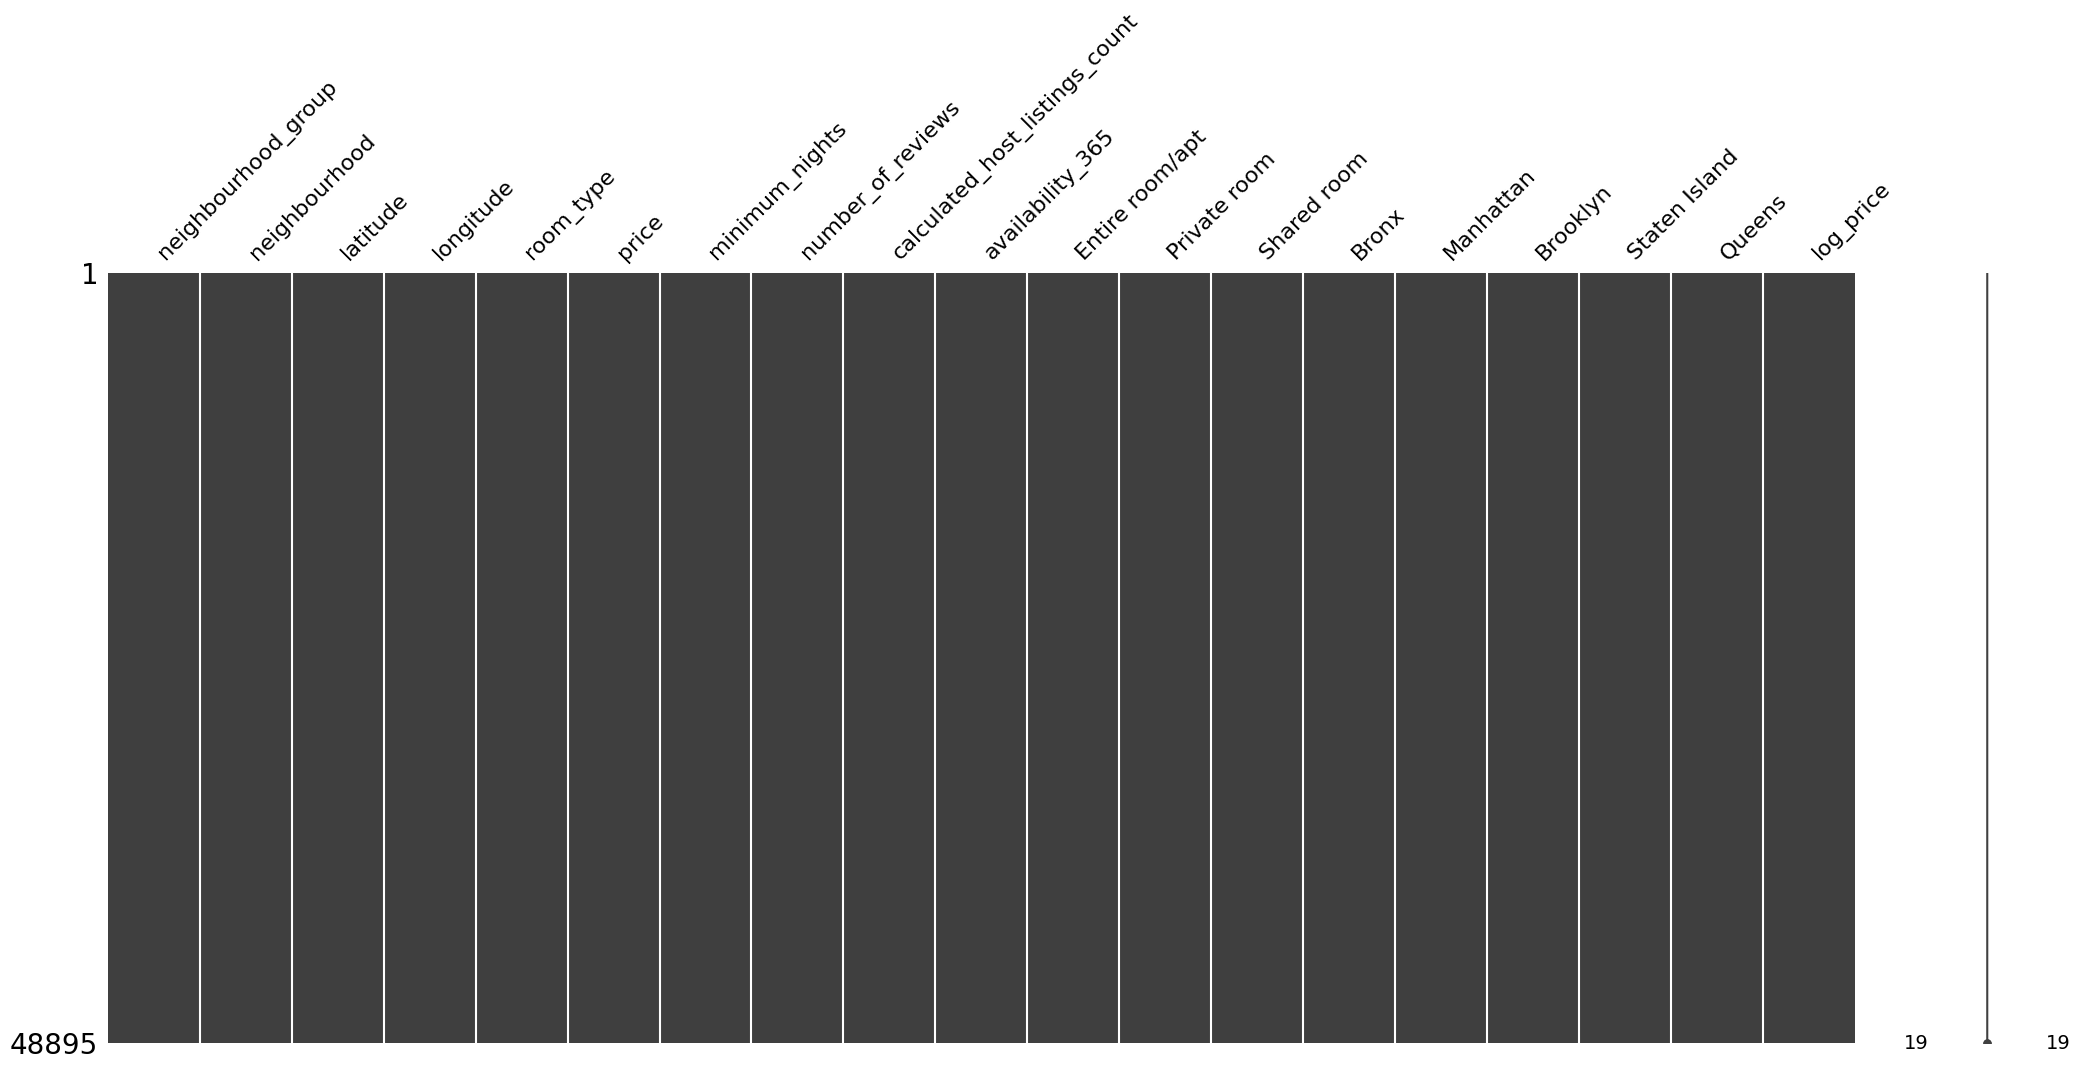

In [16]:
msno.matrix(df)


In [17]:
x = np.asarray(df.drop(['price', 'log_price', 'neighbourhood_group', 'neighbourhood', 'room_type'], axis=1))
y = df['log_price']

print(x)

x = sm.add_constant(x)
model = sm.OLS(y,x).fit()



[[ 40.64749 -73.97237   1.      ...   1.        0.        0.     ]
 [ 40.75362 -73.98377   1.      ...   0.        0.        0.     ]
 [ 40.80902 -73.9419    3.      ...   0.        0.        0.     ]
 ...
 [ 40.81475 -73.94867  10.      ...   0.        0.        0.     ]
 [ 40.75751 -73.99112   1.      ...   0.        0.        0.     ]
 [ 40.76404 -73.98933   7.      ...   0.        0.        0.     ]]


In [18]:
cooks_distance = model.get_influence().cooks_distance[0]

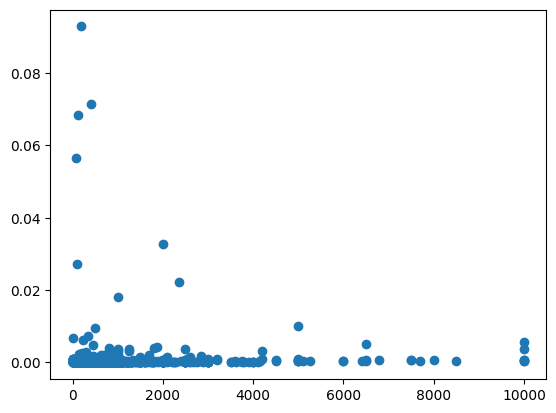

In [19]:
plt.scatter(df.price, cooks_distance)
plt.show()

In [20]:
np.where(cooks_distance>0.08)
df.drop([5767], axis=0, inplace=True)


In [21]:
df.drop(['minimum_nights'], inplace=True, axis=1)

In [22]:
df_num = df.drop(['neighbourhood_group', 'neighbourhood', 'room_type'], axis=1)
df_num.apply(lambda x: x.skew())

latitude                           0.237169
longitude                          1.284195
price                             19.120997
number_of_reviews                  3.690596
calculated_host_listings_count     7.933090
availability_365                   0.763459
Entire room/apt                   -0.078682
Private room                       0.174180
Shared room                        6.259130
Bronx                              6.468474
Manhattan                          0.229507
Brooklyn                           0.361053
Staten Island                     11.318068
Queens                             2.400165
log_price                          0.607985
dtype: float64

In [23]:
binary_cols = df[(df==0)|(df==1)].dropna(axis=1).columns
binary_cols



Index(['Entire room/apt', 'Private room', 'Shared room', 'Bronx', 'Manhattan',
       'Brooklyn', 'Staten Island', 'Queens'],
      dtype='object')

In [24]:
df_numerical= df.drop(binary_cols, axis=1)
print(df_numerical)

df_numerical = df_numerical.drop(['neighbourhood', 'neighbourhood_group', 'room_type'], axis = 1)

      neighbourhood_group       neighbourhood  latitude  longitude  \
0                Brooklyn          Kensington  40.64749  -73.97237   
1               Manhattan             Midtown  40.75362  -73.98377   
2               Manhattan              Harlem  40.80902  -73.94190   
3                Brooklyn        Clinton Hill  40.68514  -73.95976   
4               Manhattan         East Harlem  40.79851  -73.94399   
...                   ...                 ...       ...        ...   
48890            Brooklyn  Bedford-Stuyvesant  40.67853  -73.94995   
48891            Brooklyn            Bushwick  40.70184  -73.93317   
48892           Manhattan              Harlem  40.81475  -73.94867   
48893           Manhattan      Hell's Kitchen  40.75751  -73.99112   
48894           Manhattan      Hell's Kitchen  40.76404  -73.98933   

             room_type  price  number_of_reviews  \
0         Private room  149.0                  9   
1      Entire home/apt  225.0                 45   
2  

In [25]:
print(df_numerical)

       latitude  longitude  price  number_of_reviews  \
0      40.64749  -73.97237  149.0                  9   
1      40.75362  -73.98377  225.0                 45   
2      40.80902  -73.94190  150.0                  0   
3      40.68514  -73.95976   89.0                270   
4      40.79851  -73.94399   80.0                  9   
...         ...        ...    ...                ...   
48890  40.67853  -73.94995   70.0                  0   
48891  40.70184  -73.93317   40.0                  0   
48892  40.81475  -73.94867  115.0                  0   
48893  40.75751  -73.99112   55.0                  0   
48894  40.76404  -73.98933   90.0                  0   

       calculated_host_listings_count  availability_365  log_price  
0                                   6               365   5.003946  
1                                   2               355   5.416100  
2                                   1               365   5.010635  
3                                   1              

In [26]:
#  para calcular IQR y aplicar winsorización
def winsorize_column(column, lower, upper):
    q1 = column.quantile(lower)
    q3 = column.quantile(upper)
    iqr_value = q3-q1
    lower_bound = q1 - 1.5 * iqr_value
    upper_bound = q3 + 1.5 * iqr_value
    column = column.clip(lower=lower_bound, upper=upper_bound)
    return column

In [27]:
#Calcular IQR y aplicar Widsorizacion a cada columna

for column in df_numerical.columns:
    df_numerical[column] = winsorize_column(df_numerical[column], 0.1, 0.9)


In [28]:
df_numerical.apply(lambda x: x.skew())

latitude                          0.237169
longitude                         1.213509
price                             2.107369
number_of_reviews                 2.473166
calculated_host_listings_count    2.472987
availability_365                  0.763459
log_price                         0.563436
dtype: float64

In [29]:
df_new = pd.concat([df_numerical, df[binary_cols]], axis=1 )
df_new.head()

,latitude,longitude,price,number_of_reviews,calculated_host_listings_count,availability_365,log_price,Entire room/apt,Private room,Shared room,Bronx,Manhattan,Brooklyn,Staten Island,Queens
0,40.64749,-73.97237,149.0,9,6,365,5.003946,0,1,0,0,0,1,0,0
1,40.75362,-73.98377,225.0,45,2,355,5.416100,1,0,0,0,1,0,0,0
2,40.80902,-73.94190,150.0,0,1,365,5.010635,0,1,0,0,1,0,0,0
3,40.68514,-73.95976,89.0,175,1,194,4.488636,1,0,0,0,0,1,0,0
4,40.79851,-73.94399,80.0,9,1,0,4.382027,1,0,0,0,1,0,0,0


In [30]:
from sklearn.ensemble import IsolationForest
# Crea un modelo de Isolation Forest y ajustalo a los datos
model = IsolationForest().fit(df_new)

# Predice si cada observación es un valor atípico (anomalía) o no
predictions = model.predict(df_new)

# 'predictions' contendrá 1 para observaciones normales y -1 para valores atípicos
print(f'Observaciones predichas como atípicas: {np.where(predictions==-1)[0]}')


Observaciones predichas como atípicas: [    0     3     7 ... 48877 48888 48892]


In [31]:
len(np.where(predictions == -1)[0])

11598

In [32]:
df_corr = df_new.corr()
df_corr.style.background_gradient(cmap='coolwarm').format(precision=3)

,latitude,longitude,price,number_of_reviews,calculated_host_listings_count,availability_365,log_price,Entire room/apt,Private room,Shared room,Bronx,Manhattan,Brooklyn,Staten Island,Queens
latitude,1.000,0.087,0.065,-0.019,0.034,-0.011,0.080,-0.006,0.004,0.004,0.331,0.591,-0.673,-0.191,0.017
longitude,0.087,1.000,-0.281,0.058,-0.011,0.083,-0.333,-0.195,0.187,0.031,0.228,-0.442,0.021,-0.285,0.625
price,0.065,-0.281,1.000,-0.065,0.048,0.123,0.928,0.501,-0.470,-0.105,-0.077,0.302,-0.177,-0.034,-0.152
number_of_reviews,-0.019,0.058,-0.065,1.000,-0.049,0.183,-0.041,-0.004,0.011,-0.025,0.012,-0.050,0.023,0.019,0.032
calculated_host_listings_count,0.034,-0.011,0.048,-0.049,1.000,0.416,0.012,-0.041,0.014,0.089,-0.004,0.099,-0.118,0.002,0.030
availability_365,-0.011,0.083,0.123,0.183,0.416,1.000,0.099,-0.007,-0.011,0.058,0.061,-0.005,-0.080,0.058,0.087
log_price,0.080,-0.333,0.928,-0.041,0.012,0.099,1.000,0.618,-0.567,-0.173,-0.105,0.349,-0.192,-0.045,-0.185
Entire room/apt,-0.006,-0.195,0.501,-0.004,-0.041,-0.007,0.618,1.000,-0.953,-0.162,-0.052,0.160,-0.074,-0.008,-0.108
Private room,0.004,0.187,-0.470,0.011,0.014,-0.011,-0.567,-0.953,1.000,-0.143,0.043,-0.158,0.079,0.008,0.101
Shared room,0.004,0.031,-0.105,-0.025,0.089,0.058,-0.173,-0.162,-0.143,1.000,0.031,-0.009,-0.017,0.000,0.027


In [33]:
df_corr[df_corr.log_price.abs() < 0.1].index

Index(['latitude', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'Staten Island'],
      dtype='object')

In [34]:
df_corr[df_corr.log_price.abs() > 0.4].index

Index(['price', 'log_price', 'Entire room/apt', 'Private room'], dtype='object')

In [38]:
#Calculate the Variance Inflation Factor (Measures the influence to a variable's variance by other variables.)

vif = pd.Series([variance_inflation_factor(df_corr.values, i) for i in range(df_corr.shape[1])], index=df_new.columns)

vif

latitude                                42.30
longitude                               51.93
price                                  528.72
number_of_reviews                        1.56
calculated_host_listings_count           2.69
availability_365                         3.02
log_price                              779.02
Entire room/apt                           inf
Private room                              inf
Shared room                               inf
Bronx                              3386394.04
Manhattan                          1905500.23
Brooklyn                           1124685.57
Staten Island                    135069926.79
Queens                             1338426.81
dtype: float64

In [39]:
X = df_new.drop(['log_price', 'price'], axis=1)
y = df_new['log_price']

In [40]:
#Crear Modelo con 20% de los datos, el 80% restante se utilizará para entrenay y mejorar el modelo.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Crea un modelo XGBoost Regressor
model = xgb.XGBRegressor(objective='reg:squarederror')

In [42]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [43]:
#How much the variable affects the studied variable, in this case the price.

model.feature_importances_

array([0.01103322, 0.01446696, 0.00582402, 0.00873667, 0.00927156,
       0.6437247 , 0.02346188, 0.00344911, 0.00744246, 0.26090652,
       0.00435566, 0.00193088, 0.00539638], dtype=float32)

In [44]:
feature_names = X.columns

In [45]:
d_imp = dict(zip(feature_names,  model.feature_importances_))
d_imp

{'latitude': 0.011033217,
 'longitude': 0.014466955,
 'number_of_reviews': 0.0058240173,
 'calculated_host_listings_count': 0.00873667,
 'availability_365': 0.00927156,
 'Entire room/apt': 0.6437247,
 'Private room': 0.023461876,
 'Shared room': 0.0034491075,
 'Bronx': 0.0074424637,
 'Manhattan': 0.26090652,
 'Brooklyn': 0.004355659,
 'Staten Island': 0.0019308812,
 'Queens': 0.005396376}

In [46]:
#Order variables by importance

for k, v in dict(sorted(d_imp.items(), key=lambda x:x[1], reverse = True)).items():
  print(k, v)

Entire room/apt 0.6437247
Manhattan 0.26090652
Private room 0.023461876
longitude 0.014466955
latitude 0.011033217
availability_365 0.00927156
calculated_host_listings_count 0.00873667
Bronx 0.0074424637
number_of_reviews 0.0058240173
Queens 0.005396376
Brooklyn 0.004355659
Shared room 0.0034491075
Staten Island 0.0019308812


In [47]:
# Input: d_imp, corr_mat, imp_cut, corr_cut
# Output: ls_vars_to_drop
def get_vars_to_delete(d_imp, corr_mat, imp_cut=0.01, corr_cut=0.1):
  # Inicializo una lista vacía que contendrá las columnas a eliminar
  ls_res = []
  # Identifico aquellas variables cuya correlación en absoluto con la variable LOG_PRICE es menor a corr_cut
  low_corr_vars = corr_mat[corr_mat.LOG_PRICE.abs()<corr_cut].index
  # Para cada una de esas variables
  for var_name in low_corr_vars:
    # Compruebo si su impotarcia es menor a imp_cut
    if d_imp[var_name]<imp_cut:
      # De ser así guardo el nombre de la variable
      ls_res.append(var_name)
  # Retorno la lista
  return ls_res

In [48]:
X_copy = X_train.copy()
X_copy['LOG_PRICE'] = y_train.values

vars_to_delete =  get_vars_to_delete(d_imp, X_copy.corr())
vars_to_delete

['number_of_reviews',
 'calculated_host_listings_count',
 'availability_365',
 'Staten Island']

In [50]:
X_train.drop(vars_to_delete, axis=1, inplace=True)
X_test.drop(vars_to_delete, axis=1, inplace=True)

In [ ]:
binary_cols = X_train[(X_train==0)|(X_train==1)].dropna(axis=1).columns
X_train_num = X_train.drop(binary_cols, axis=1)
X_test_num = X_test.drop(binary_cols, axis=1)